The purpose of this project is to create a dashboard that explores the UK government fuel price dataset. The dataset is available from www.gov.uk

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import panel as pn
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime

In [2]:
# import the csv file containing the fuel price data
fuel_df = pd.read_csv('csv-010621.csv')

In [3]:
# inspect the data
fuel_df.head(6)

,Weekly Prices time series,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Weekly Prices time series,Pump price in pence/litre,NaN,Duty rate in pence/litre,NaN,VAT percentage rate,NaN,NaN,ULSP = Ultra low sulpur unleaded petrol,NaN,NaN,NaN,NaN,NaN
1,Date,ULSP,ULSD,ULSP,ULSD,ULSP,ULSD,NaN,ULSD = Ultra low sulphur diesel,NaN,NaN,NaN,NaN,NaN
2,09/06/2003,74.59,76.77,45.82,45.82,17.5,17.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16/06/2003,74.47,76.69,45.82,45.82,17.5,17.5,NaN,ULSP and ULSD,NaN,NaN,NaN,NaN,NaN
4,23/06/2003,74.42,76.62,45.82,45.82,17.5,17.5,NaN,Duty rate per litre (�) from 7 March 2001,NaN,NaN,NaN,NaN,0.4582
5,30/06/2003,74.35,76.51,45.82,45.82,17.5,17.5,NaN,Duty rate per litre (�) from 1 October 2003,NaN,NaN,NaN,NaN,0.4710


In [4]:
fuel_df.tail(6)

,Weekly Prices time series,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
935,26/04/2021,125.8,129.77,57.95,57.95,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936,03/05/2021,126.09,130,57.95,57.95,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,10/05/2021,126.53,130.43,57.95,57.95,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,17/05/2021,127.19,131.03,57.95,57.95,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,24/05/2021,127.89,131.52,57.95,57.95,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,31/05/2021,128.15,131.82,57.95,57.95,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
fuel_df.columns

Index(['Weekly Prices time series', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')

In [6]:
fuel_df.dtypes

Weekly Prices time series     object
Unnamed: 1                    object
Unnamed: 2                    object
Unnamed: 3                    object
Unnamed: 4                    object
Unnamed: 5                    object
Unnamed: 6                    object
Unnamed: 7                   float64
Unnamed: 8                    object
Unnamed: 9                   float64
Unnamed: 10                  float64
Unnamed: 11                  float64
Unnamed: 12                  float64
Unnamed: 13                  float64
dtype: object

In [7]:
# remove the first two rows that do not contain data
fuel_df = fuel_df.iloc[2:-1].reset_index()

In [8]:
# remove the unused columns
columns = ['Weekly Prices time series', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']

fuel_df = fuel_df[columns]

fuel_df.head()

,Weekly Prices time series,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,09/06/2003,74.59,76.77,45.82,45.82,17.5,17.5
1,16/06/2003,74.47,76.69,45.82,45.82,17.5,17.5
2,23/06/2003,74.42,76.62,45.82,45.82,17.5,17.5
3,30/06/2003,74.35,76.51,45.82,45.82,17.5,17.5
4,07/07/2003,74.28,76.46,45.82,45.82,17.5,17.5


In [9]:
# convert price / duty / vat columns to float
cols_convert = fuel_df.columns.drop('Weekly Prices time series')

fuel_df[cols_convert] = fuel_df[cols_convert].apply(pd.to_numeric, errors='coerce')

In [10]:
# convert date column to date-time
fuel_df['Weekly Prices time series'] = pd.to_datetime(fuel_df['Weekly Prices time series'], 
                                                      dayfirst=True, format='%d/%m/%Y')

# check data types
fuel_df.dtypes

Weekly Prices time series    datetime64[ns]
Unnamed: 1                          float64
Unnamed: 2                          float64
Unnamed: 3                          float64
Unnamed: 4                          float64
Unnamed: 5                          float64
Unnamed: 6                          float64
dtype: object

In [11]:
# investigate the numerical data
fuel_df.describe()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
count,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000
mean,111.367857,115.904371,54.629030,54.629030,18.792644,18.792644
std,18.113248,19.192381,4.630244,4.630244,1.524058,1.524058
min,74.210000,76.410000,45.820000,45.820000,15.000000,15.000000
25%,96.170000,99.837500,50.350000,50.350000,17.500000,17.500000
50%,114.350000,118.250000,57.950000,57.950000,20.000000,20.000000
75%,127.295000,132.337500,57.950000,57.950000,20.000000,20.000000
max,142.170000,148.040000,58.950000,58.950000,20.000000,20.000000


In [12]:
# check for missing values
fuel_df.isnull().sum()

Weekly Prices time series    0
Unnamed: 1                   0
Unnamed: 2                   0
Unnamed: 3                   0
Unnamed: 4                   0
Unnamed: 5                   0
Unnamed: 6                   0
dtype: int64

In [13]:
# rename the columns
fuel_df.columns = ['date', 'price_petrol', 'price_diesel', 'duty_petrol', 'duty_diesel', 'vat_petrol', 'vat_diesel']

fuel_df.head(12)

,date,price_petrol,price_diesel,duty_petrol,duty_diesel,vat_petrol,vat_diesel
0,2003-06-09,74.59,76.77,45.82,45.82,17.5,17.5
1,2003-06-16,74.47,76.69,45.82,45.82,17.5,17.5
2,2003-06-23,74.42,76.62,45.82,45.82,17.5,17.5
3,2003-06-30,74.35,76.51,45.82,45.82,17.5,17.5
4,2003-07-07,74.28,76.46,45.82,45.82,17.5,17.5
5,2003-07-14,74.21,76.41,45.82,45.82,17.5,17.5
6,2003-07-21,75.07,76.90,45.82,45.82,17.5,17.5
7,2003-07-28,75.10,76.86,45.82,45.82,17.5,17.5
8,2003-08-04,75.12,76.81,45.82,45.82,17.5,17.5
9,2003-08-11,75.44,77.08,45.82,45.82,17.5,17.5


We have the pump prices and duty in pence and VAT as a percentage. To illustrate how much of the pump price is duty, how much VAT and how much is the actual fuel price it will be useful to calculate the VAT paid in pence. Also we can then calculate the net pump price excluding duty and VAT.  

In [14]:
# create a list of the fuel types for use in loops
fuel_type_lst = ['petrol', 'diesel']

# create vat_paid columns
for fuel_type in fuel_type_lst:
    fuel_df['vat_paid_{}'.format(fuel_type)] = round(fuel_df['price_{}'.format(fuel_type)] * 
                                                     (fuel_df['vat_{}'.format(fuel_type)] / 
                                                      (100 + fuel_df['vat_{}'.format(fuel_type)])), 2)

In [15]:
# create net_price columns
for fuel_type in ['petrol', 'diesel']:
    fuel_df['net_price_{}'.format(fuel_type)] = round(fuel_df['price_{}'.format(fuel_type)] - 
                                                      (fuel_df['duty_{}'.format(fuel_type)] + 
                                                       fuel_df['vat_paid_{}'.format(fuel_type)]), 2)

fuel_df.head()

,date,price_petrol,price_diesel,duty_petrol,duty_diesel,vat_petrol,vat_diesel,vat_paid_petrol,vat_paid_diesel,net_price_petrol,net_price_diesel
0,2003-06-09,74.59,76.77,45.82,45.82,17.5,17.5,11.11,11.43,17.66,19.52
1,2003-06-16,74.47,76.69,45.82,45.82,17.5,17.5,11.09,11.42,17.56,19.45
2,2003-06-23,74.42,76.62,45.82,45.82,17.5,17.5,11.08,11.41,17.52,19.39
3,2003-06-30,74.35,76.51,45.82,45.82,17.5,17.5,11.07,11.40,17.46,19.29
4,2003-07-07,74.28,76.46,45.82,45.82,17.5,17.5,11.06,11.39,17.40,19.25


We don't need the time component of the datetime format so we'll convert the dates to date format.

In [16]:
# convert the dates from datetime format to date format 
fuel_df['date'] = fuel_df.apply(lambda row: row['date'].date(), axis=1)

fuel_df.head()

,date,price_petrol,price_diesel,duty_petrol,duty_diesel,vat_petrol,vat_diesel,vat_paid_petrol,vat_paid_diesel,net_price_petrol,net_price_diesel
0,2003-06-09,74.59,76.77,45.82,45.82,17.5,17.5,11.11,11.43,17.66,19.52
1,2003-06-16,74.47,76.69,45.82,45.82,17.5,17.5,11.09,11.42,17.56,19.45
2,2003-06-23,74.42,76.62,45.82,45.82,17.5,17.5,11.08,11.41,17.52,19.39
3,2003-06-30,74.35,76.51,45.82,45.82,17.5,17.5,11.07,11.40,17.46,19.29
4,2003-07-07,74.28,76.46,45.82,45.82,17.5,17.5,11.06,11.39,17.40,19.25


Before creating the dashboard, we will create the individual plots that will be included. All the plots will compare petrol and diesel over a particular period. In the final dashboard the user will be able to select the period of interest.

The first plot will be a line graph of pump price over time to give an overview of how prices have varied over time.

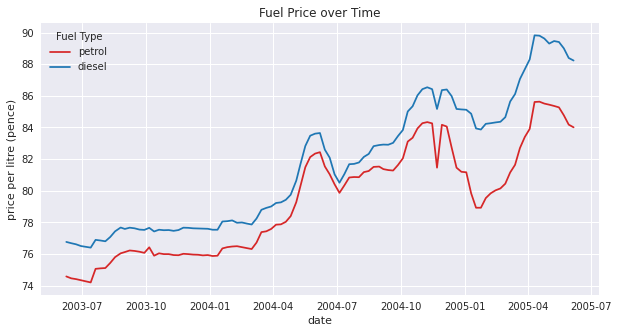

In [17]:
# create a plot of price over time

# set a start_date and end_date
start_date = datetime(2003, 6, 9).date()
end_date = datetime(2005, 6, 9).date()

with plt.style.context('seaborn'):
    colors = {'petrol': 'tab:red', 'diesel': 'tab:blue'}
    plt.figure(figsize=(10,5))
    for fuel_type in ['petrol', 'diesel']:
        plt.plot(fuel_df[(fuel_df.date >= start_date) & (fuel_df.date <= end_date)]['date'], 
                 fuel_df[(fuel_df.date >= start_date) & (fuel_df.date <= end_date)]['price_{}'.format(fuel_type)], 
                 label=fuel_type,
                c=colors[fuel_type])
    plt.xlabel('date')
    plt.ylabel('price per litre (pence)')
    plt.title('Fuel Price over Time')
    plt.legend(title='Fuel Type', loc='best')

The next plot will be a boxplot showing the distribution of prices over the period.

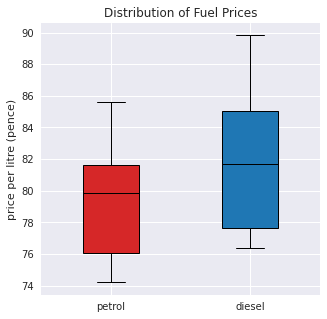

In [18]:
# create a boxplot of prices over time

with plt.style.context('seaborn'):
    colors = {'petrol': 'tab:red', 'diesel': 'tab:blue'}
    plt.figure(figsize=(5,5))
    bplot = plt.boxplot([fuel_df[(fuel_df.date >= start_date) & (fuel_df.date <= end_date)]['price_petrol'],
                 fuel_df[(fuel_df.date >= start_date) & (fuel_df.date <= end_date)]['price_diesel']],
               labels=['petrol', 'diesel'],
               patch_artist=True,
                       widths=0.4)
    plt.ylabel('price per litre (pence)')
    plt.title('Distribution of Fuel Prices')
    for patch, color in zip(bplot['boxes'], colors.values()):
        patch.set_facecolor(color)
    plt.setp(bplot['medians'], color='black')
    #plt.setp(bplot['boxes'], facecolor=['lightblue', 'lightgreen'])
    #plt.boxplot['boxes'].set_facecolor(['lightblue', 'lightgreen'])

The final plot will be a stacked barchart of the mean pump price over the period showing the proportion of duty and VAT. 

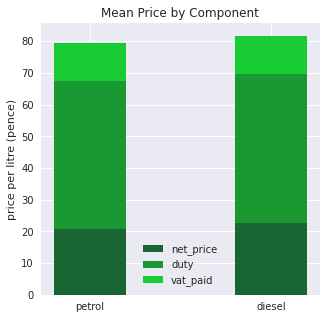

In [19]:
# create a barchart of the mean price / duty / vat over time
components = ['net_price', 'duty', 'vat_paid']
component_means = []
colors = [(0.1, 0.4, 0.2), (0.1, 0.6, 0.2), (0.1, 0.8, 0.2)]
    
for item in components:
    for fuel_type in ['petrol', 'diesel']:
        com_fuel_mean = fuel_df[(fuel_df.date >= start_date) & (fuel_df.date <= end_date)]['{}_{}'.format(item, fuel_type)].mean()
        component_means.append(com_fuel_mean)

# set y axis offset
y_offset = np.zeros(2)

# plot each component
with plt.style.context('seaborn'):
    plt.figure(figsize=(5,5))
    for i in range(len(components)):
        bar = plt.bar([1, 2], [component_means[2 * i], component_means[(2 * i) + 1]], 
                      0.4, bottom = y_offset, color=colors[i])
    
        # update y_offset
        y_offset = y_offset + [component_means[2 * i], component_means[(2 * i) + 1]]
    
    plt.xticks([1, 2], ['petrol', 'diesel'])
    plt.ylabel('price per litre (pence)')
    plt.title('Mean Price by Component')
    plt.legend(components)

Next we will combine all the plots into a function for use in the Panel interact function.

In [20]:
# define a function that will produce all the plots as a single figure
def create_figure(start_date, end_date):
    with plt.style.context('seaborn'):
        fig = plt.figure(constrained_layout=True, figsize=(12, 12))
        specs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
        
        ax1 = fig.add_subplot(specs[0, :])
        ax2 = fig.add_subplot(specs[1, 0])
        ax3 = fig.add_subplot(specs[1, 1])
        
        ## ax1 - scatter plot
        colors = {'petrol': 'tab:red', 'diesel': 'tab:blue'}
        for fuel_type in fuel_type_lst:
            ax1.plot(fuel_df[(fuel_df.date >= start_date) & (fuel_df.date <= end_date)]['date'], 
                 fuel_df[(fuel_df.date >= start_date) & (fuel_df.date <= end_date)]['price_{}'.format(fuel_type)], 
                 label=fuel_type,
                c=colors[fuel_type])
        ax1.set_xlabel('date')
        ax1.set_ylabel('price per litre (pence)')
        ax1.set_title('Fuel Price from {} to {}'.format(start_date, end_date))
        ax1.legend(title='Fuel Type', loc='best')
        
        ## ax2 - boxplot
        colors = {'petrol': 'tab:red', 'diesel': 'tab:blue'}
        bplot = ax2.boxplot([fuel_df[(fuel_df.date >= start_date) & (fuel_df.date <= end_date)]['price_petrol'],
                 fuel_df[(fuel_df.date >= start_date) & (fuel_df.date <= end_date)]['price_diesel']],
               labels=['petrol', 'diesel'],
               patch_artist=True, widths=0.4)
        ax2.set_ylabel('price per litre (pence)')
        ax2.set_title('Distribution of Fuel Prices')
        for patch, color in zip(bplot['boxes'], colors.values()):
            patch.set_facecolor(color)
        plt.setp(bplot['medians'], color='black')
        
        ## ax3 - barchart
        components = ['net_price', 'duty', 'vat_paid']
        component_means = []
        colors = [(0.1, 0.4, 0.2), (0.1, 0.6, 0.2), (0.1, 0.8, 0.2)]
    
        for item in components:
            for fuel_type in fuel_type_lst:
                com_fuel_mean = fuel_df[(fuel_df.date >= start_date) & (fuel_df.date <= end_date)]['{}_{}'.format(item, fuel_type)].mean()
                component_means.append(com_fuel_mean)

        # set y axis offset
        y_offset = np.zeros(2)

        # plot each component
        for i in range(len(components)):
            ax3.bar([1, 2], [component_means[2 * i], component_means[(2 * i) + 1]], 0.4, bottom = y_offset, color=colors[i])
    
            # update y_offset
            y_offset = y_offset + [component_means[2 * i], component_means[(2 * i) + 1]]
    
        ax3.set_xticks([1, 2])
        ax3.set_xticklabels(['petrol', 'diesel'])
        ax3.set_ylabel('price per litre (pence)')
        ax3.set_title('Mean Price by Component')
        ax3.legend(components)
        
        plt.close(fig)
        return fig

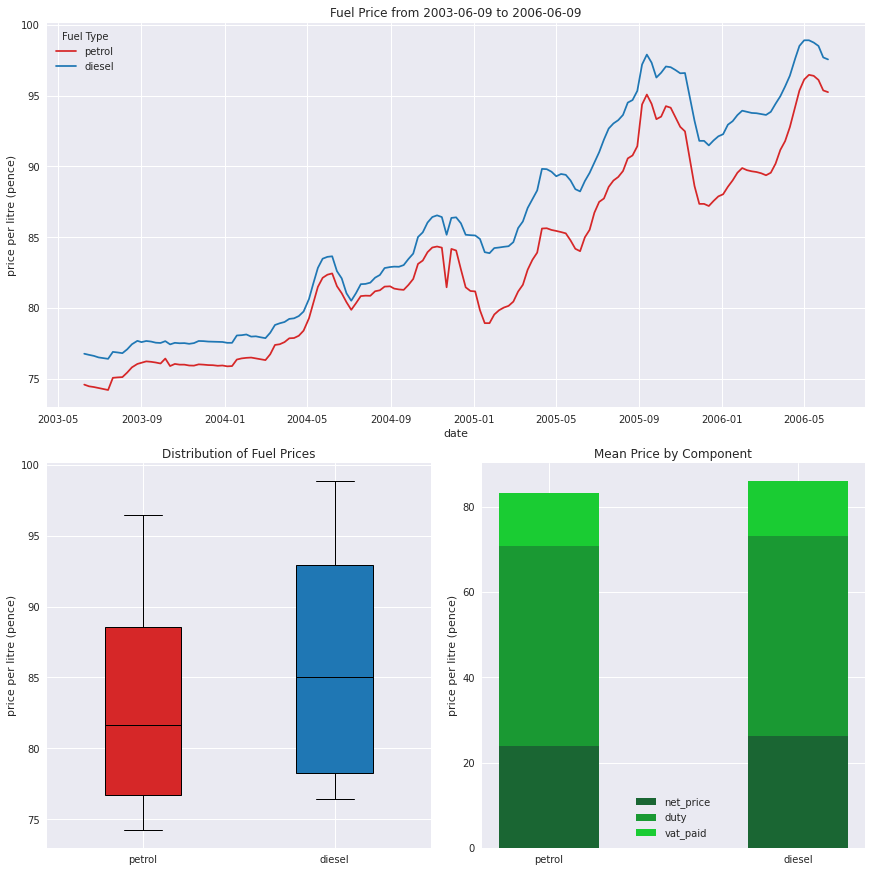

In [21]:
create_figure(datetime(2003, 6, 9).date(), datetime(2006, 6, 9).date())

Now we are ready to create a dashboard.

In [22]:
# call the panel extension method to load it
pn.extension()

In [23]:
# create the date selection drop-downs
f1 = pn.widgets.Select(options=list(fuel_df['date']), name='Select Start Date')
f2 = pn.widgets.Select(options=list(fuel_df['date']), name='Select End Date')

In [24]:
# create dash function with wrapper
@pn.depends(f1.param.value, f2.param.value)
def create_dash(f1, f2):
    return create_figure(f1, f2)

Column
    [0] StaticText(align='center', value='<h3>UK Fuel P...)
    [1] Row(align='center')
        [0] Select(options=[datetime.date(2003, ...], value=datetime.date(2003, 6, 9))
        [1] Select(options=[datetime.date(2003, ...], value=datetime.date(2003, 6, 9))
    [2] Row
        [0] ParamFunction(function)
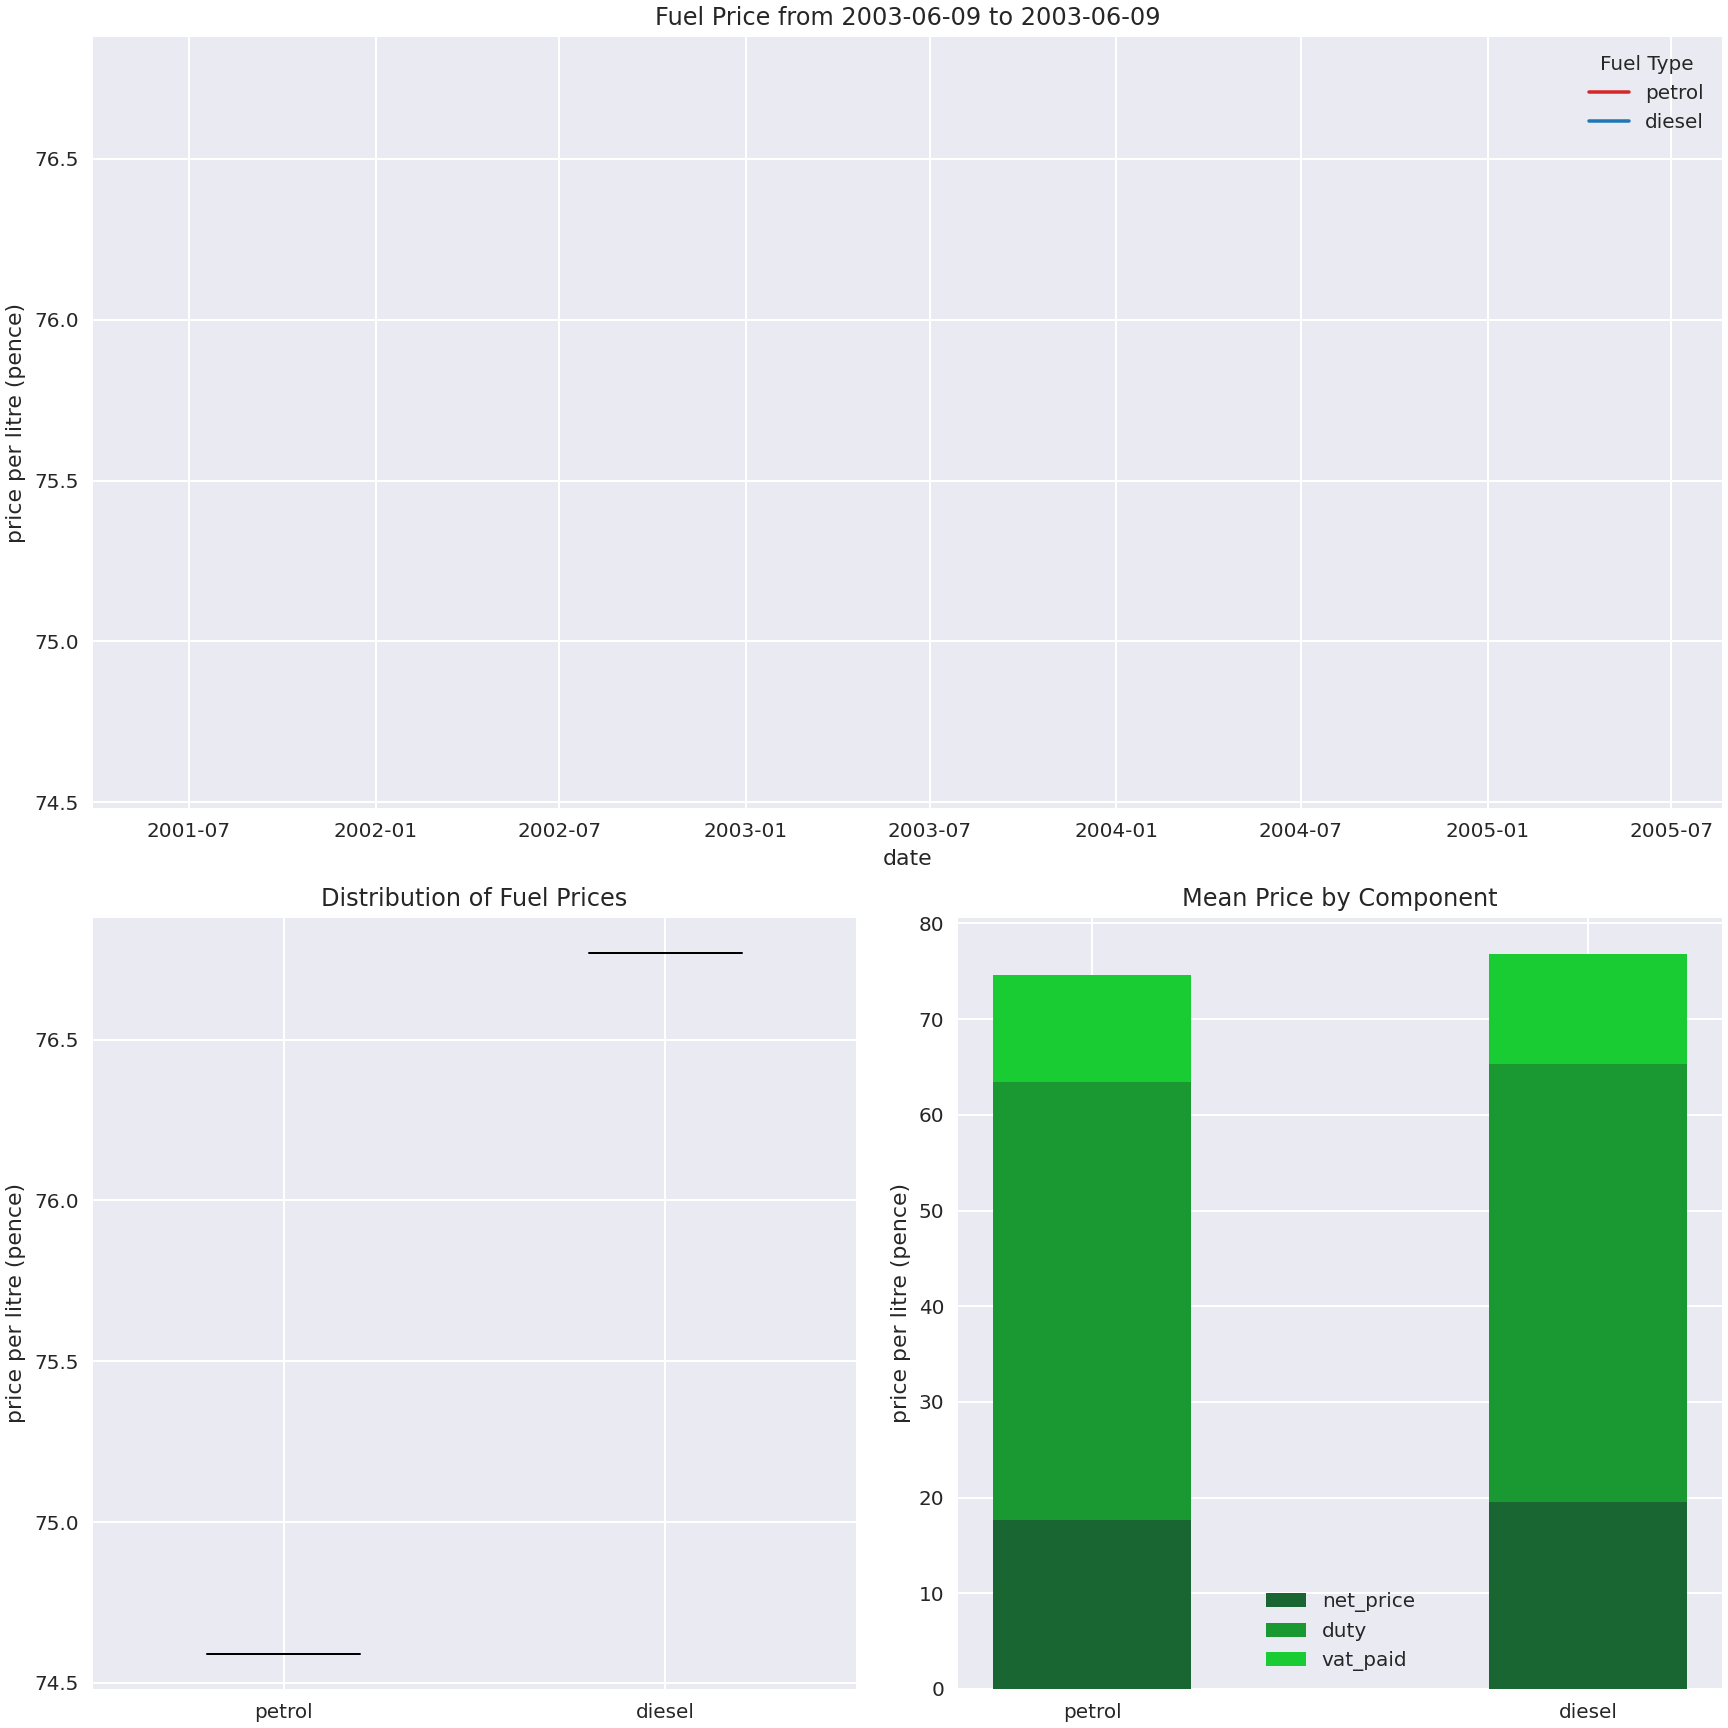

In [25]:
# create dash
heading = '<h3>UK Fuel Price Analysis Dashboard</h3>\nData from www.gov.uk'
text = pn.widgets.StaticText(value=heading, align='center')

dash_3 = pn.Column(
                    text,
                    pn.Row(f1, f2, align='center'),
                    pn.Row(create_dash)
                    )

dash_3